In [1]:
import pandas as pd
import os
import pyodbc
import time
import scipy
from scipy.spatial import ConvexHull
import scipy.spatial as spatial
from math import radians, cos, sin, asin, sqrt
import sklearn.utils
from sklearn import metrics
import scipy.cluster.hierarchy as sch
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.nan)

In [2]:
os.chdir("C:/Users/ajpk/Desktop/Work Bundles")
os.getcwd()

'C:\\Users\\ajpk\\Desktop\\Work Bundles'

In [3]:
#Get the mtr geo data from the csv
start_time = time.time()

                          
mtr_geo_df=pd.read_csv('mtr_geo.csv')

mtr_geo_df=mtr_geo_df.dropna()
mtr_geo_df['PREM_LATITUDE']=np.round(mtr_geo_df['PREM_LATITUDE'],2)
mtr_geo_df['PREM_LONGITUDE']=np.round(mtr_geo_df['PREM_LONGITUDE'],2)
mtr_geo_df = mtr_geo_df.drop_duplicates()
end_time = time.time()
print(end_time -start_time)
mtr_geo_df.head()

23.817657232284546


,DIV_NAME,PHYSICAL_RTE,SubArea,PREM_LATITUDE,PREM_LONGITUDE
0,Peninsula,KRNF2,PRNS101,37.59,-122.33
1,Stockton,WXVF7,QXVS101,37.70,-121.45
2,Peninsula,SRNF1,PRNS104,37.53,-122.27
3,Diablo,XJCF1,DJCS105,37.99,-121.71
4,San Francisco,GRGH2,RRGS109,37.75,-122.41


In [5]:
points=mtr_geo_df.as_matrix(columns=['PREM_LONGITUDE','PREM_LATITUDE'])
hull = ConvexHull(points)
hull.area

22.70624516416524

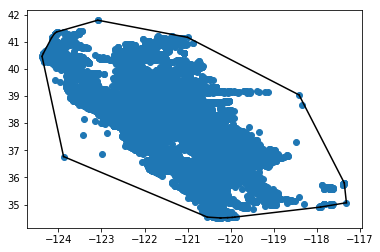

In [6]:
plt.plot(points[:,0], points[:,1],'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex, 1],'k-')

In [7]:
#make the hulls around the divs and subAreas, rounded the lat/long for simplicity
start_time = time.time()
cols = ['DIV_NAME', 'poly']
div_poly = pd.DataFrame(columns = cols)
divs = mtr_geo_df['DIV_NAME'].unique()
for i,d in enumerate(divs):
    da = mtr_geo_df[mtr_geo_df['DIV_NAME']==d]
    points=np.round(da.as_matrix(columns=['PREM_LONGITUDE','PREM_LATITUDE']),2)
    points = np.unique(points, axis=0)
    hull = ConvexHull(points)
    data = {'DIV_NAME':d,'poly':hull.points}
    div_poly=div_poly.append(data, ignore_index=True)

div_poly.to_csv('div_polys.csv')
end_time = time.time()
print(end_time -start_time)

4.567128419876099


In [8]:
#make the hulls around the divs and subAreas, rounded the lat/long for simplicity
start_time = time.time()
cols = ['SubArea', 'poly']
sa_poly = pd.DataFrame(columns = cols)
sas = mtr_geo_df['SubArea'].unique()
for i,s in enumerate(sas):
    sa = mtr_geo_df[mtr_geo_df['SubArea']==s]
    points=np.round(da.as_matrix(columns=['PREM_LONGITUDE','PREM_LATITUDE']),2)
    points = np.unique(points, axis=0)
    hull = ConvexHull(points)
    data = {'SubArea':s,'poly':hull.points}
    sa_poly=sa_poly.append(data, ignore_index=True)

sa_poly.to_csv('sa_polys.csv')
end_time = time.time()
print(end_time -start_time)

76.86407923698425
